<a href="https://colab.research.google.com/github/MonitSharma/Learn-Machine-Learning-with-Me/blob/main/Learning_From_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Learn from the Data?


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## Example

Let's start with a simple exercise of classifying credit risk analysis

We have the following features
1. **Risk** - ordinal
2. **Income** - continuous
3. **Credit History** - ordinal

We want to find the rules that would help us classify the three risk type.

Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

The data file is available [here](https://github.com/amitkaps/hackermath/blob/master/data/creditRisk.csv)

In [2]:
df = pd.read_csv("creditRisk.csv")

## Visualize the data

In [3]:
df.head()

,Income,Credit History,Risk
0,0,Unknown,High
1,0,Bad,High
2,0,Good,High
3,14000,Unknown,High
4,14000,Bad,High


In [4]:
df.dtypes

Income             int64
Credit History    object
Risk              object
dtype: object

### Plotting the data

We will use seaborn for this

In [5]:
import seaborn as sns

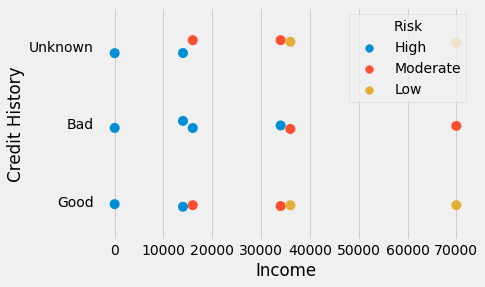

In [6]:
sns.stripplot(data = df, x = "Income", y = "Credit History", hue = "Risk", size = 10)


## Reformulating the Data

We have one ordinal variable (Risk) and one nominal variable (Credit History)

Lets use a dictionary for encoding nominal variable

In [7]:

df.Risk.unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [8]:
Risk_mapping = {
       'High': 2,
       'Moderate': 1,
       'Low': 0}

In [9]:
df['Risk'] = df['Risk'].map(Risk_mapping)

In [10]:
df['Credit History'].unique()

array(['Unknown', 'Bad', 'Good'], dtype=object)

In [11]:
Credit_mapping = {
        'Unknown': 0,
        'Bad': -1,
        'Good': 1}

In [12]:
df['Credit History'] = df['Credit History'].map(Credit_mapping)

In [13]:
df.head()

,Income,Credit History,Risk
0,0,0,2
1,0,-1,2
2,0,1,2
3,14000,0,2
4,14000,-1,2


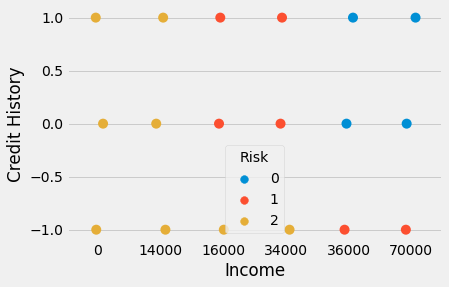

In [14]:
sns.stripplot(data = df, x = "Income", y = "Credit History", hue = "Risk", size = 10)


## Decision Tree Classifier

In [15]:
data = df.iloc[:,0:2]
target = df.iloc[:,2:3]

In [16]:
from sklearn import tree

In [17]:
clf = tree.DecisionTreeClassifier()

In [18]:
clf

DecisionTreeClassifier()

In [19]:
clf = clf.fit(data, target)

## Visualize the Tree

In [20]:
import pydotplus 
from IPython.display import Image

In [21]:
data.columns

Index(['Income', 'Credit History'], dtype='object')

In [22]:
target.columns

Index(['Risk'], dtype='object')

In [23]:
dot_data = tree.export_graphviz(clf, out_file='tree.dot', feature_names=data.columns,
                                class_names=['Low', 'Moderate', 'High'], filled=True, 
                                rounded=True, special_characters=True)

In [24]:
graph = pydotplus.graph_from_dot_file('tree.dot')  

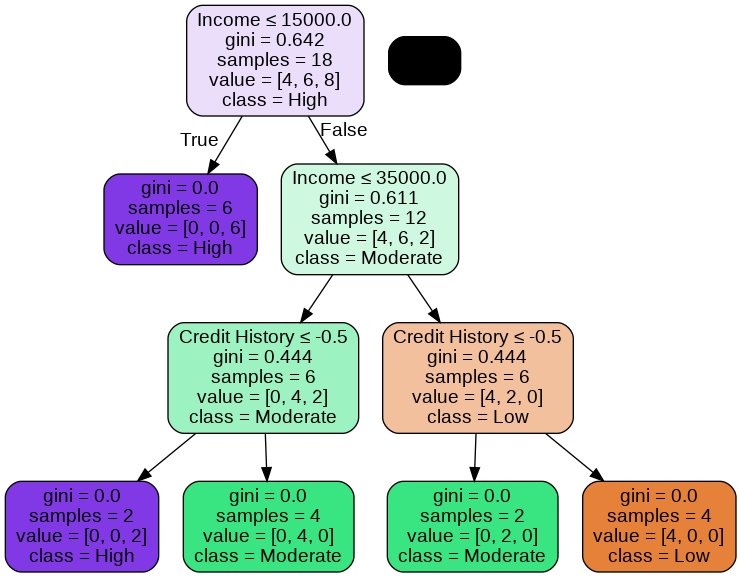

In [25]:
Image(graph.create_png()) 

## Theory behind Decision Trees


**Terminology**

1. Each root node represents a single input variable $(x)$ and a split point on that variable.
2. The leaf nodes of the tree contain an output variable $(y)$ which is used to make a prediction.
------------
----------


**Growing the tree**

1. The first choice we have is how many branches we split the trees. And we choose Binary Tree because otherwise it will explode due to combinatorial explosion. So **BINARY TREES** is a practical consideration.
2. The second decision is to choose which variable and where to split it. We need to have an objective function to do this



One objective function is to maximize the information gain (IG) at each split:

$$IG(D_p,f)= I(D_p) - \frac{N_{right}}{N} I(D_{right}) - \frac{N_{left}}{N} I(D_{left})$$

where:

1. $f$ is the feature to perform the split

2. $D_p$, $D_{left}$ and $D_{right}$ are the datasets of the parent, left and right child node, respectively

3. $I$ is the impurity measure

4. $N$ is the total number of samples
 and 

5. $N_{left}$ and $N_{right}$ is the number of samples in the left and right child node.






Now we need to first define an Impurity measure. The three popular impurity measures are:

- Gini Impurity
- Entropy
- Classification Error


-----------------


Gini Impurity and Entropy lead to similiar results when growing the tree, while Classification error is not as useful for growing the tree (but for pruning the tree) - See example [here]( http://sebastianraschka.com/faq/docs/decision-tree-binary.html).


-------------------



Lets understand Gini Impurity a little better. Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset, Gini impurity can be computed by summing the probability $t_i$
 of an item with label $i$  being chosen times the probability $1-t_i$
 of a mistake in categorizing that item.



 $$I_{G}(f)=\sum _{i=1}^{J}t_{i}(1-t_{i})=\sum _{i=1}^{J}(t_{i}-{t_{i}}^{2})=\sum _{i=1}^{J}t_{i}-\sum _{i=1}^{J}{t_{i}}^{2}=1-\sum _{i=1}^{J}{t_{i}}^{2}$$


 

## Let's calculate for the entire dataset

$$I_G(t) = 1 - \left(\frac{6}{18}\right)^2 - \left(\frac{4}{18}\right)^2 - \left(\frac{8}{18}\right)^2 = 1 - \frac{116}{256} = 0.642$$

Low - $4$, Moderate - $6$, High - $8$ and total observations are $18$

-----

`scikit-learn` uses an optimized **CART algorithm**, which will use a **greedy approach**.


A greedy approach is used to divide the space called recursive binary splitting. This is a numerical procedure where all the values are lined up and different split points are tried and tested using a objective cost function. The split with the best cost (lowest cost because we minimize cost) is selected.

Another way to think of this is that a learned binary tree is actually a partitioning of the input space. You can think of each input variable as a dimension on an p-dimensional space. The decision tree split this up into rectangles (when $p=2$ input variables) or some kind of hyper-rectangles with more inputs.

We can draw these partitions for our dataset


In [27]:
x_min, x_max = data.iloc[:, 0].min() - 2000, data.iloc[:, 0].max() + 2000
y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100), np.arange(y_min, y_max, (y_max - y_min)/100))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


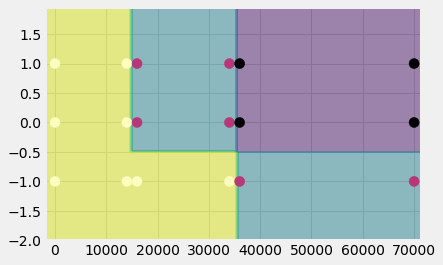

In [34]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.5)
plt.scatter(x = data.iloc[:,0], y = data.iloc[:,1], c = df['Risk'], s = 100, cmap=plt.cm.magma)


## Stop Growing the tree
1. The obvious point to stop growing the tree is when the Gini Impurity = 0, that is there is only one label left in a node.

2. Another option is to define a max_depth of the tree, though this may lead to suboptimal trees.

3. The most common stopping procedure is to use a minimum count on the number of training instances assigned to each leaf node. If the count is less than some minimum then the split is not accepted and the node is taken as a final leaf node.
